Text(0.5, 1.0, 'Original image')

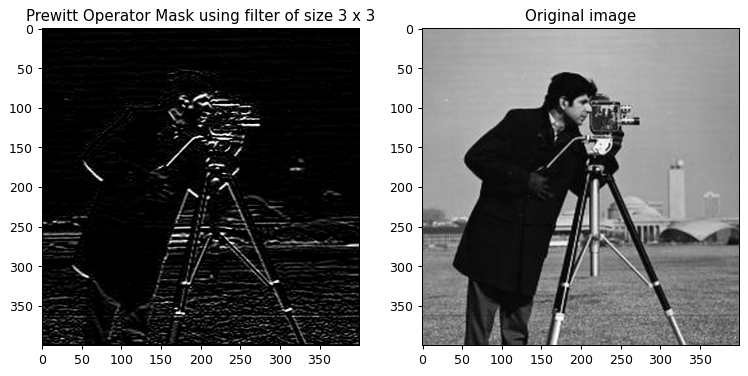

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def firstDerivative_filter(image,filter_size):
    image = image.resize((400,400), Image.LANCZOS)
    numpy_image = np.array(image)
    
    #new array for manipulation
    new_array = np.zeros((400+(filter_size-1),(400+(filter_size-1))))
    
    """
    How i got the formulae -->   say filter size 3 then array should start from 1
    if filter size 3 then it should start from 2 and so on. then 
    
    so (required_index * 2 + 1 = filter_size)
        that gives required_index = (filter_size-1)/2
    
    """
    
    #padding 0s  to image 
    start = int((filter_size-1)/2)
    end = int(400+((filter_size-1)/2))
    
    new_array[start:end,start:end] = numpy_image
    

   #initializing FILTER
    #  This is for 3x3 filter, this can also be done for other filter sizes
    #  by chaging filter size and filter matrix.

    
    #Prewitt filter Horizontal and Vertical
    Filter = [[-1,-1,-1],[0,0,0],[1,1,1]] # Along Y axis
    #Filter = [[-1,0,1],[-1,0,1],[-1,0,1]]  # Along X axis 
    
    filter_mapped_values = []
    for i in range(400):
        for j in range(400):
            #extracting part of array equal to the filter size
            temp = new_array[i:(filter_size+i),j:(filter_size+j)]
            
            multiplied_array = np.multiply(Filter,temp)
            sum_array = np.sum(multiplied_array)
            filter_mapped_values.append(sum_array)
    
    # creating array of defined size from the calculated list
    result = np.resize(filter_mapped_values,(400,400))
    result_image = Image.fromarray(result)
    
    return result_image


filter_size = 3  #show values for different filter size

loaded_img = Image.open('C:/Users/hp/Python_programming/digital image processing assignment/Images/prewitt.png').convert('L')
image = loaded_img.resize((400,400), Image.LANCZOS)
final_img = firstDerivative_filter(loaded_img,filter_size)

'''
saving the image
if final_img.mode != 'RGB':
    final_img = final_img.convert('RGB')
final_img.save("saved.jpg")
'''
#displaying the images

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), dpi=90)
ax[0].imshow(final_img, cmap='gray')
ax[0].set_title('Prewitt Operator Mask using filter of size ' +str(filter_size) +' x ' + str(filter_size))
ax[1].imshow(image, cmap='gray')
ax[1].set_title('Original image')